# Analysis of Survey Responses

In [ ]:
import pandas
import matplotlib

df = pandas.read_csv('Environmental_Engagement_Survey.csv')

## Demographics Data

In [ ]:
df.iloc[:, 24].value_counts()


Female        45
Male          26
Non-binary     1
Agender        1
Name: Gender, dtype: int64

<AxesSubplot:>

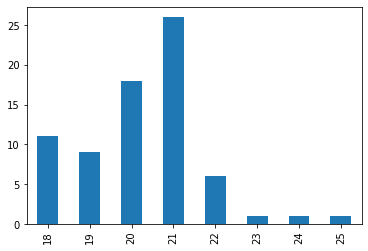

In [ ]:
df.iloc[:, 23].value_counts().plot(kind="bar")

In [ ]:
df.iloc[:, 28].value_counts()

Friend     36
Groupme    35
Slack       2
Name: How did you come to receive this survey? Ex: Groupme, slack workspace, friend, etc., dtype: int64

## Partitioning data into question sections
For easier analysis

In [ ]:
df_section_one = df.iloc[:, :8]
df_section_two = df.iloc[:, 8:14]
df_section_three = df.iloc[:, 14:21]


In [ ]:
# of respondents that indicated based on responses that they don't care at all about climate change or environmental issues

dont_care = df.loc[(df_section_one.iloc[:, 6] == 'Agree') | (df_section_one.iloc[:, 5] == 'Agree')]
len(dont_care)

3

In [ ]:
# People that disagree with the statement that environmental issues don't apply to them

df_section_one.iloc[:, 2].value_counts()["Disagree"] / df_section_one.shape[0] * 100

94.52054794520548

In [ ]:
# People that don't agree with the statement that environmental issues don't apply to them

(df_section_one.iloc[:, 2].value_counts()["Disagree"] + df_section_one.iloc[:, 2].value_counts()["Neutral"]) / df_section_one.shape[0] * 100

100.0

In [ ]:
# People that disagree that they don't need to do anything because it is the government's job

df_section_one.iloc[:, 4].value_counts()["Disagree"] / df_section_one.shape[0] * 100

73.97260273972603

In [ ]:
# People that don't agree that they need to do anything because it is the government's job

(df_section_one.iloc[:, 4].value_counts()["Disagree"] + df_section_one.iloc[:, 4].value_counts()["Neutral"]) / df_section_one.shape[0] * 100

95.8904109589041

In [ ]:
# People that feel like they can do something about climate change

df_section_one.iloc[:, 1].value_counts()["Agree"] / df_section_one.shape[0] * 100

42.465753424657535

In [ ]:
# People that don't feel like they can't do something about climate change

(df_section_one.iloc[:, 1].value_counts()["Agree"] + df_section_one.iloc[:, 1].value_counts()["Neutral"]) / df_section_one.shape[0] * 100

75.34246575342466

In [ ]:
# % of people that agreed that they wished they knew the environmental impact of the products they buy

df_section_three.iloc[:,2].value_counts()["Agree"] / len(df) * 100

83.56164383561644

In [ ]:
# % of people that did not disagree wished they knew the environmental impact of the products they buy

(df_section_three.iloc[:,2].value_counts()["Agree"] + df_section_three.iloc[:,2].value_counts()["Neutral"]) / len(df) * 100

100.0

## Distinctions based on Engagement groups
High, medium or low based on summed values of section two answers

### Tagged values
- Always = 1
- Sometimes = 0
- Never = 1

<AxesSubplot:>

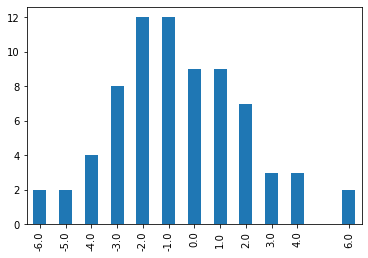

In [ ]:
for i in range(6):
    df_section_two.iloc[:, i][df_section_two.iloc[:, i] == 'Never'] = -1
    df_section_two.iloc[:, i][df_section_two.iloc[:, i] == 'Sometimes'] = 0
    df_section_two.iloc[:, i][df_section_two.iloc[:, i] == 'Always'] = 1

df_section_two["sum"] = df_section_two.sum(axis=1)


# Distribution of actions taken

df_section_two["sum"].value_counts().plot(kind="bar")

In [ ]:
high_engagement = df.loc[(df_section_two["sum"] > 1)]
high_engagement_section_one = high_engagement.iloc[:, 0:8]
high_engagement_section_two = high_engagement.iloc[:, 8:14]
high_engagement_section_three = high_engagement.iloc[:, 14:21]
high_engagement.shape

(15, 31)

In [ ]:
low_engagement = df.loc[(df_section_two["sum"] < -1)]
low_engagement_section_one = low_engagement.iloc[:, 0:8]
low_engagement_section_two = low_engagement.iloc[:, 8:14]
low_engagement_section_three = low_engagement.iloc[:, 14:21]
low_engagement.shape

(28, 31)

In [ ]:
medium_engagement = df.loc[(df_section_two["sum"] >= -1) & (df_section_two["sum"] <= 1)]
medium_engagement_section_one = medium_engagement.iloc[:, 0:8]
medium_engagement_section_two = medium_engagement.iloc[:, 8:14]
medium_engagement_section_three = medium_engagement.iloc[:, 14:21]
medium_engagement.shape

(30, 31)

In [ ]:
low_engagement_section_one.iloc[:, 7].value_counts()["Agree"] / len(low_engagement_section_one) * 100

82.14285714285714

In [ ]:
medium_engagement_section_one.iloc[:, 7].value_counts()["Agree"] / len(medium_engagement_section_one) * 100

93.33333333333333

In [ ]:
high_engagement_section_one.iloc[:, 7].value_counts()["Agree"] / len(high_engagement_section_one) * 100

93.33333333333333

## Analysis of questions pertaining to people's first and second preferences

In [ ]:
# ----- constants ----- #

INDVIMPACT = "Your own individual environmental impact"
PRODUCTIMPACT = "The environmental impact of the products you buy"
FIRSTCHOICE_IDX = 21
SECONDCHOICE_IDX = 22

<AxesSubplot:>

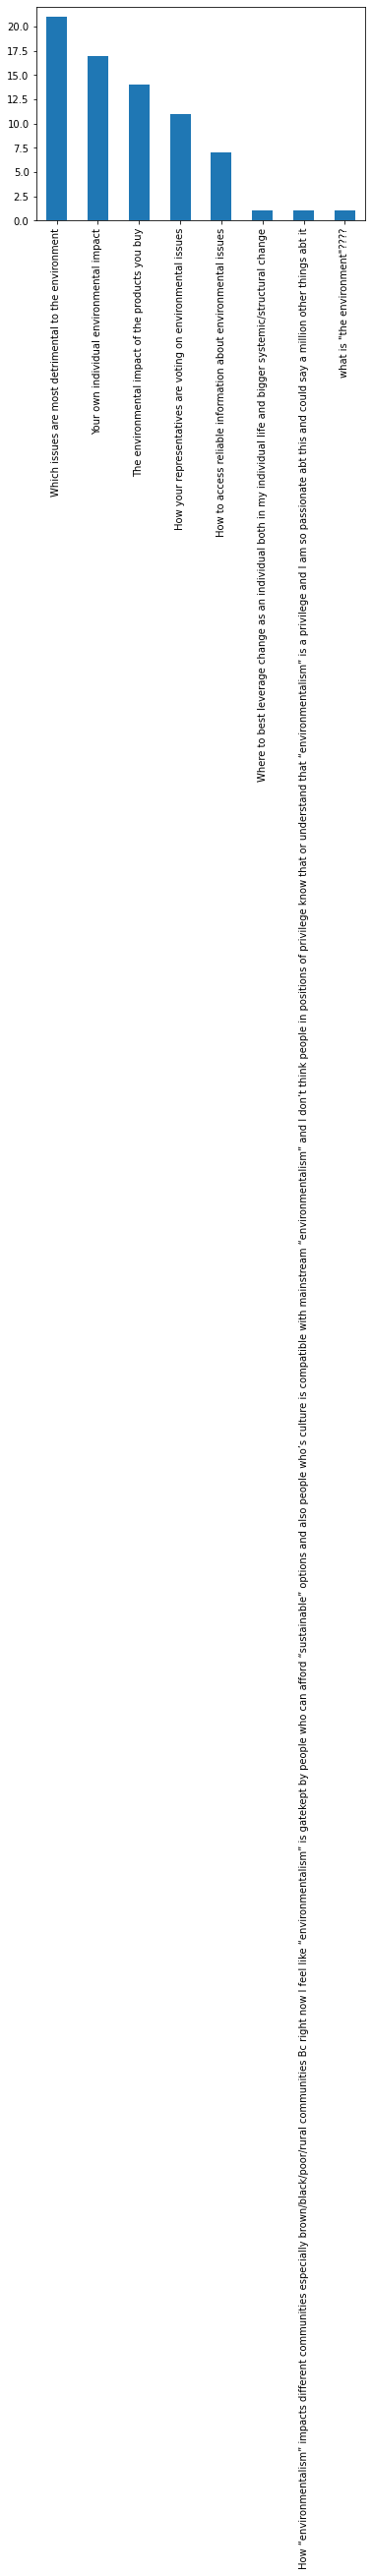

In [ ]:
# ----- What People Want 1st ----- #

df.iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

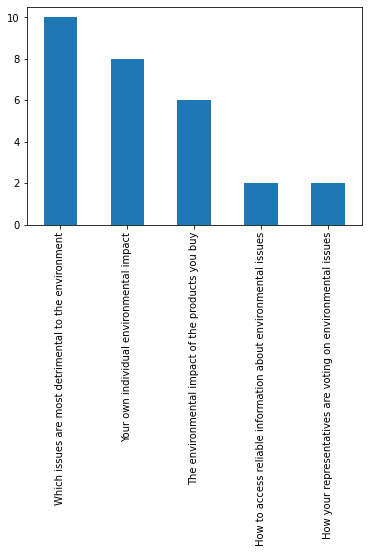

In [ ]:
low_engagement.iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

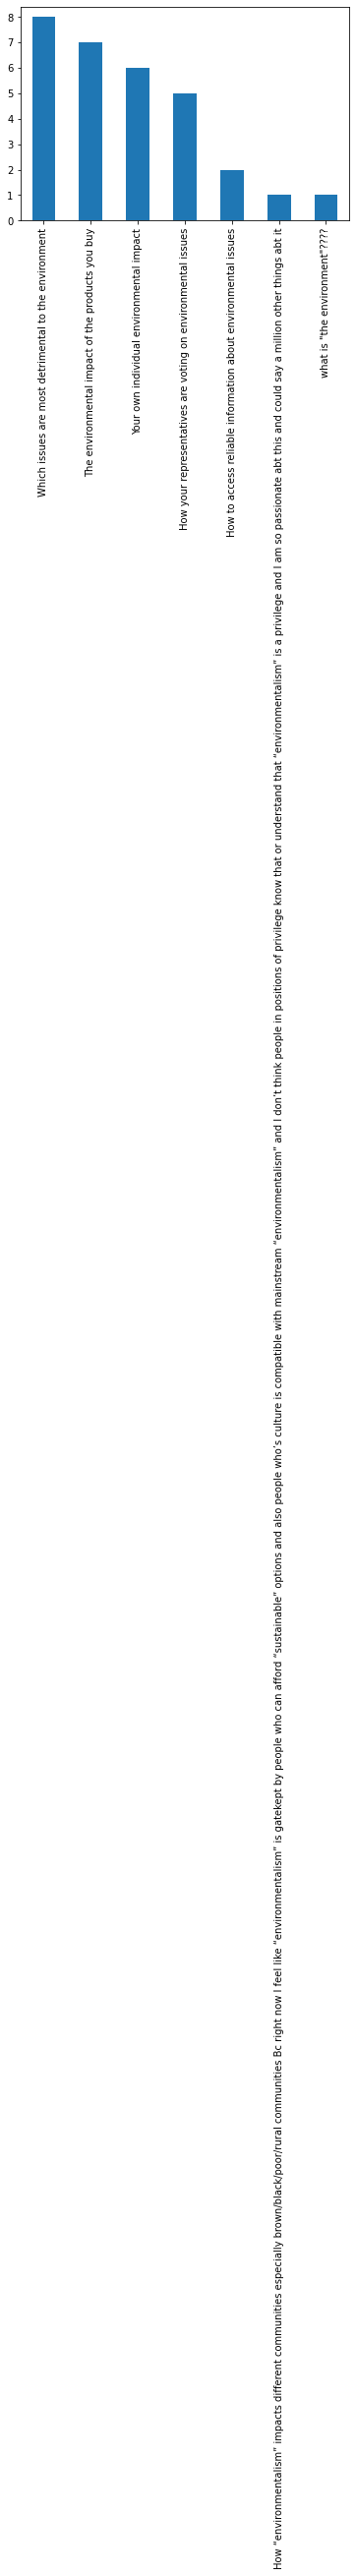

In [ ]:
medium_engagement.iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

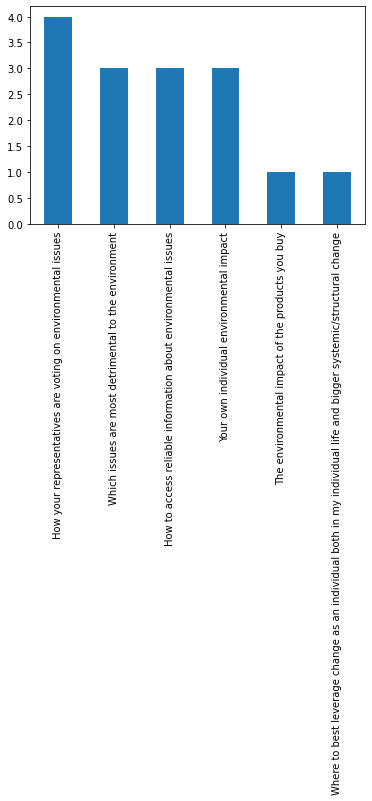

In [ ]:
high_engagement.iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

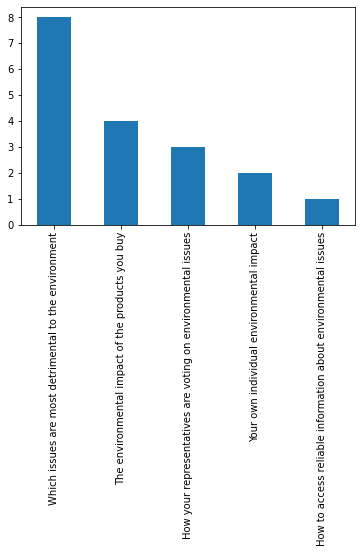

In [ ]:
# People who feel like they can't do anything about climate change

df.loc[df.iloc[:, 1] == "Disagree"].iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

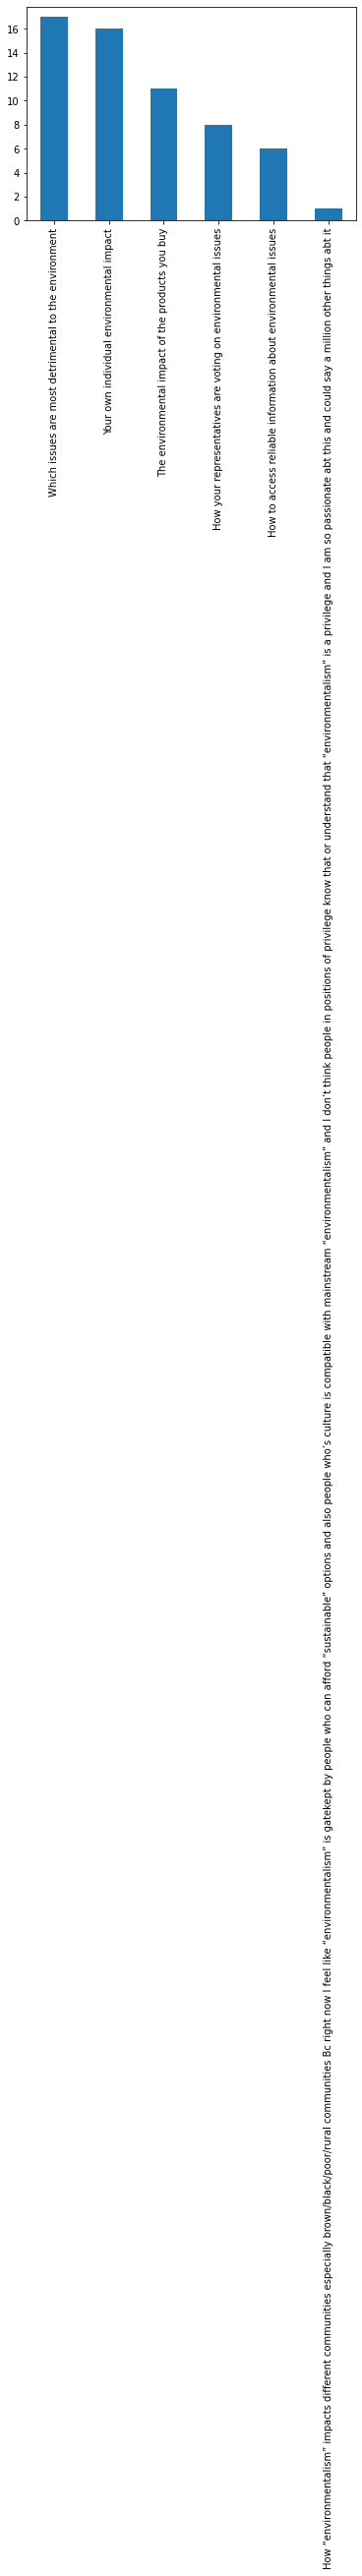

In [ ]:
# People whose academic interests are not ENVS or sustainability

df.loc[df['envs'] == 0].iloc[:, FIRSTCHOICE_IDX].value_counts().plot(kind='bar')

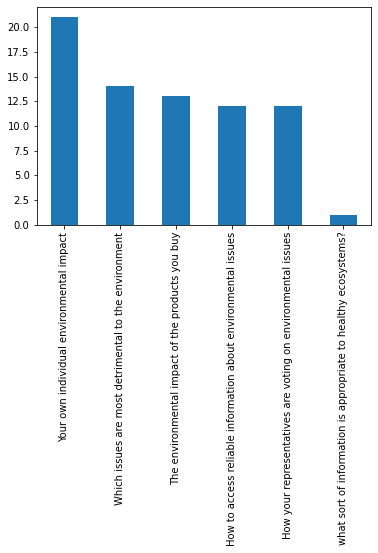

In [ ]:
# ----- What People Want 2nd ----- #

b = df.iloc[:, SECONDCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

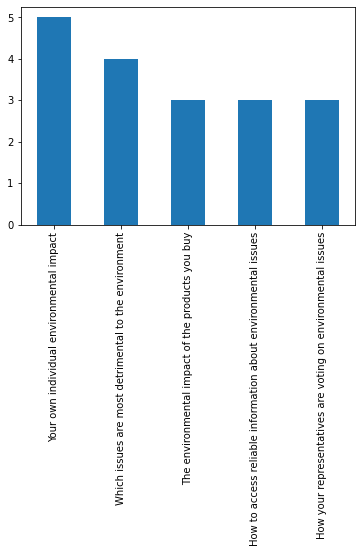

In [ ]:
# People who don't think they can do anything about climate change

df.loc[df.iloc[:, 1] == "Disagree"].iloc[:, SECONDCHOICE_IDX].value_counts().plot(kind='bar')

<AxesSubplot:>

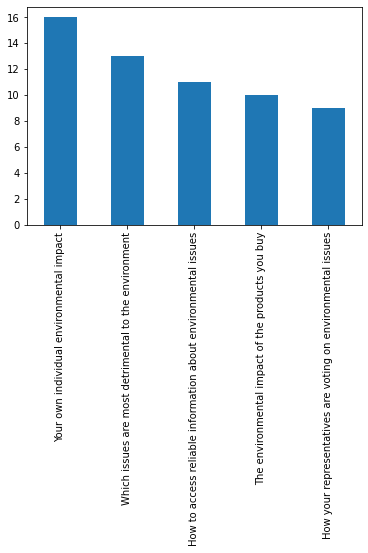

In [ ]:
# People who aren't interested in ENVS or sustainability as an academic interest

df.loc[df['envs'] == 0].iloc[:, SECONDCHOICE_IDX].value_counts().plot(kind='bar')

In [ ]:
# % of people who responded that they are interested in their own individual environmental impact as #1

df.iloc[:, FIRSTCHOICE_IDX].value_counts()[INDVIMPACT] / 73


0.2328767123287671

In [ ]:

# % of people who responded that they are interested in their own individual environmental impact as #2
df.iloc[:, 22].value_counts()[INDVIMPACT] / 73

0.2876712328767123

In [ ]:
# % of people that responded that they are interested in their own individual environmental impact as #1 or #2 choice


df.loc[df.iloc[:, FIRSTCHOICE_IDX] == INDVIMPACT, 'first_choice'] = 1
df.loc[df.iloc[:, SECONDCHOICE_IDX] == INDVIMPACT, 'second_choice'] = 1
df['first_choice'] = df['first_choice'].fillna(0)
df['second_choice'] = df['second_choice'].fillna(0)

df['indiv_impact'] = df['first_choice'] + df['second_choice']
df['indiv_impact'].value_counts()[1] / len(df) * 100

52.054794520547944

In [ ]:
# % of people that responded that they are interested in the environmental impact of products as #1 or #2 choice

df.loc[df.iloc[:, FIRSTCHOICE_IDX] == PRODUCTIMPACT, 'first_choice_product'] = 1
df.loc[df.iloc[:, SECONDCHOICE_IDX] == PRODUCTIMPACT, 'second_choice_product'] = 1
df['first_choice_product'] = df['first_choice_product'].fillna(0)
df['second_choice_product'] = df['second_choice_product'].fillna(0)

df['product_impact'] = df['first_choice_product'] + df['second_choice_product']
df['product_impact'].value_counts()[1] / len(df) * 100

34.24657534246575